# CGNN Example on the LUCAS (LUng CAncer Simple set) dataset 
## Numerical Dataset with the same structure as LUCAS.

Source : www.causality.inf.ethz.ch/data/LUCAS.html

The true dataset is the **lucas0_train.csv** file ; we use the **NUM_LUCAS.csv** file, representing a graph with continuous data which structure is the same as the true LUCAS dataset.
**Goal** : Find the causal structure of the graph using CGNN, starting from the raw data.

In [1]:
#Import libraries
import cdt
from cdt import SETTINGS
SETTINGS.verbose=False
SETTINGS.NB_JOBS=4
import networkx as nx
import time
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Detecting 0 CUDA devices.
No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NB_JOBS to cpu_count.


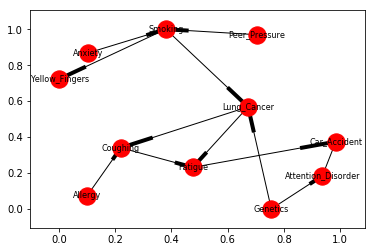

,Allergy,Anxiety,Genetics,Peer_Pressure,Attention_Disorder,Smoking,Lung_Cancer,Yellow_Fingers,Coughing,Fatigue,Car_Accident
0,-0.266076,0.460788,-0.359440,-0.403187,-0.228317,1.334455,0.574623,1.163336,0.982726,-0.840672,-0.508322
1,-0.579084,-0.846836,-0.295204,0.302683,-0.256269,-1.637193,-1.395067,0.154516,0.341314,0.933638,-1.075662
2,-0.105876,0.603170,-0.246007,-0.066926,-0.100983,0.500359,0.329122,0.199425,0.314847,-0.143226,-0.755328
3,0.727293,-0.949493,0.749637,-0.595794,0.809405,-0.586919,-0.130269,-0.840610,-0.691177,0.303761,-0.431910
4,-0.175018,-0.820478,-0.432949,-0.729511,-0.753609,-0.219810,-0.700120,-0.733240,-0.149308,0.854195,-0.633940


In [2]:
# Load data and graph solution
# So these are causal relationships that are known and have been
# emperically tested
data = pd.read_csv("NUM_LUCAS.csv")
solution = cdt.utils.read_list_edges("Lucas_graph.csv")  
nx.draw_networkx(solution, font_size=8) # The plot function allows for quick visualization of the graph. 
plt.show()
data.head()

--- Execution time : 66.4 seconds ---


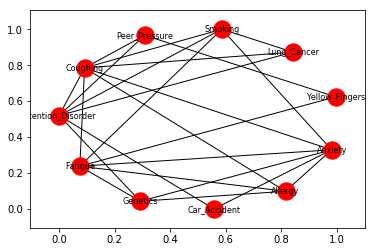

,0,1,2
0,Allergy,Anxiety,0.053813
1,Allergy,Genetics,0.046764
2,Allergy,Coughing,0.001415
3,Allergy,Fatigue,0.005937
4,Anxiety,Genetics,0.011556
5,Anxiety,Smoking,0.001662
6,Anxiety,Coughing,0.000769
7,Anxiety,Fatigue,0.005282
8,Anxiety,Car_Accident,0.003883
9,Genetics,Attention_Disorder,0.001818


In [3]:
# So the question is, if you only have the data can you find the
# structure of the graph
from cdt.independence.graph import FSGNN

Fsgnn = FSGNN()

start_time = time.time()
ugraph = Fsgnn.predict(data, train_epochs=20, test_epochs=10, threshold=5e-4, l1=0.01)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ugraph.edges(data='weight')))

In [4]:
# Orient the edges of the graph
# https://github.com/MarvinTeichmann/KittiBox/issues/49
from cdt.causality.graph import CGNN
Cgnn = CGNN()
start_time = time.time()
dgraph = Cgnn.predict(data, graph=ugraph, nb_runs=5, nb_max_runs=6, train_epochs=15, test_epochs=8)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# Plot the output graph
nx.draw_networkx(dgraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# Print output results : 
pd.DataFrame(list(dgraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])

The pairwise GNN model is computed on each edge of the UMG to initialize the model and start CGNN with a DAG


AttributeError: 'generator' object has no attribute 'next'